In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mus = .1
muq = .0025
mur = mus/muq

In [3]:
def __nonlinear_scaler(mu, umax_q, umax_s):
    mus = .1
    muq = .0025
    
    yu =  __nonlinear_scaler_equation(mu, mus, muq, umax_q, umax_s)    
    # yv =  __nonlinear_scaler_equation(mu, mus, muq, mur)                  
    return yu#, 1*yv

def __nonlinear_scaler_equation(mu, mus, muq, umax_q, umax_s):
    
    a = (umax_s - umax_q) / ( (mus**(-2) - muq**(-2)) )
    b = umax_q - a * muq**(-2)
    
    return a*mu**(-2) +b

In [4]:
umaxq = 50
umaxs = 10
x = np.arange(muq, mus+.0005, .001)
y = __nonlinear_scaler(x, umaxq, umaxs)

print(__nonlinear_scaler(.1, umaxq, umaxs))
print(__nonlinear_scaler(.08, umaxq, umaxs))
print(__nonlinear_scaler(.05, umaxq, umaxs))

9.999999999999998
10.014071294559098
10.075046904315196


In [5]:
print(x.shape)
print(y.shape)

(98,)
(98,)


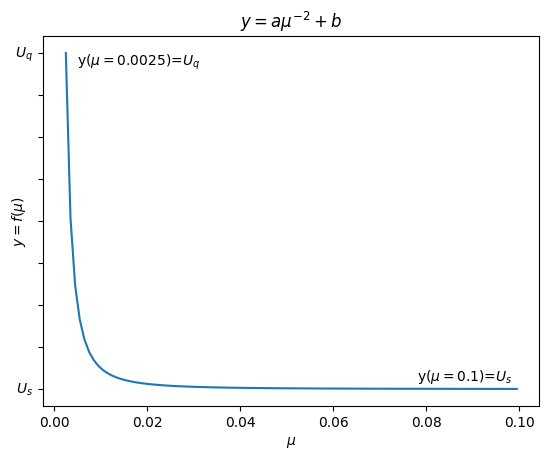

In [6]:
plt.plot(x, y)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$y = f(\mu)$')
plt.title(r'$y = a \mu^{-2} + b$')
# plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_yticklabels([])
plt.annotate(r'$U_q$', xy=(0, 49.5), xytext=(-15, 0), textcoords='offset points', 
             fontsize=10, color='black', ha='right')
plt.annotate(r'y($\mu=0.0025$)=$U_q$', xy=(0, 48.5), xytext=(105, 0), textcoords='offset points', 
             fontsize=10, color='black', ha='right')
plt.annotate(r'$U_s$', xy=(0, 9.5), xytext=(-15, 0), textcoords='offset points', 
             fontsize=10, color='black', ha='right')
plt.annotate(r'y($\mu=0.1$)=$U_s$', xy=(0, 11), xytext=(330, 0), textcoords='offset points', 
             fontsize=10, color='black', ha='right')
plt.savefig("scaler.jpeg")

In [7]:
mu= np.arange(.0025, .1, .0001)

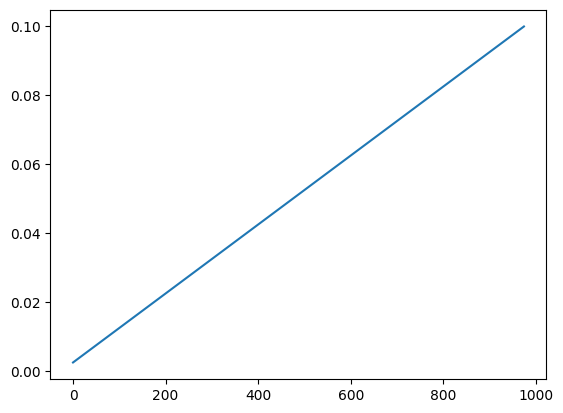

In [8]:
plt.plot(mu)

In [9]:
mu =  2* ((mu - .0025) / (.1 - .0025)) -1

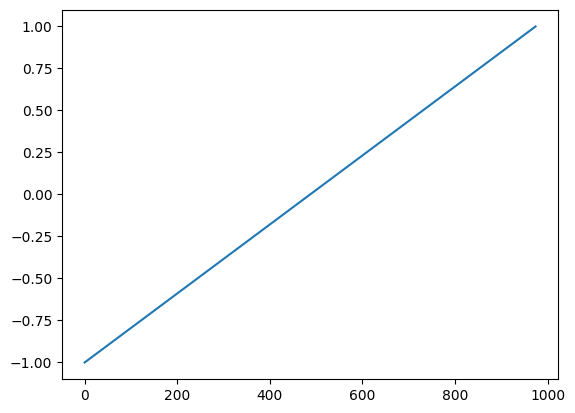

In [10]:
plt.plot(mu)

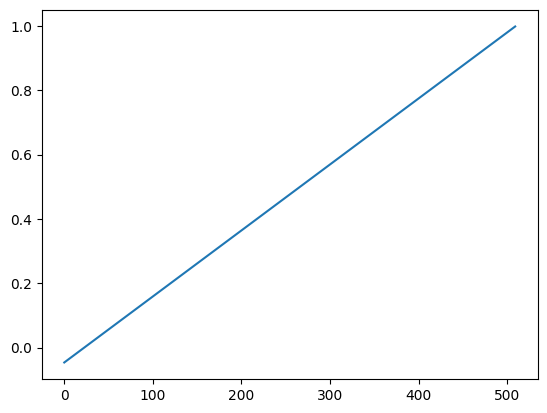

In [11]:
mu= np.arange(.049, .1, .0001)
mu =  2* ((mu - .0025) / (.1 - .0025)) -1
plt.plot(mu)

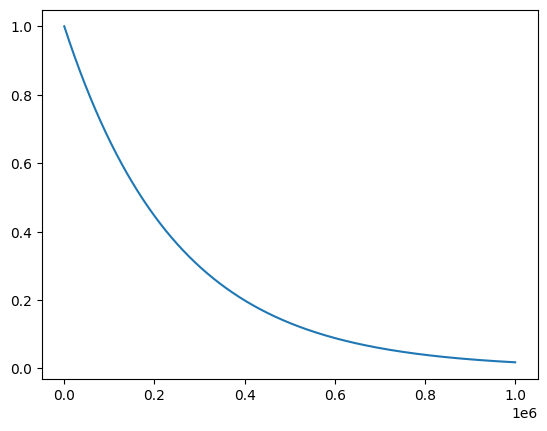

In [12]:
epochs= np.arange(1, 10**6, 1)
step0 = 1
decay_factor = .98
num_epochs = 5000
step_size =  step0*decay_factor**(epochs/num_epochs)
plt.plot(epochs, step_size)

In [13]:
step_size[-1]

0.017588017670692593

In [2]:
import jax
import jax.numpy as jnp


In [4]:
a = jnp.array([ 2, 11,  3, 15, 4])
print(jnp.sum(jnp.argsort(a)).shape)

()


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


(array([641., 666., 701., 696., 639., 697., 685., 682., 629., 691., 651.,
        668., 683., 615., 656.]),
 array([0.00274471, 0.00337826, 0.00401181, 0.00464536, 0.00527891,
        0.00591247, 0.00654602, 0.00717957, 0.00781312, 0.00844667,
        0.00908022, 0.00971377, 0.01034733, 0.01098088, 0.01161443,
        0.01224798]),
 <BarContainer object of 15 artists>)

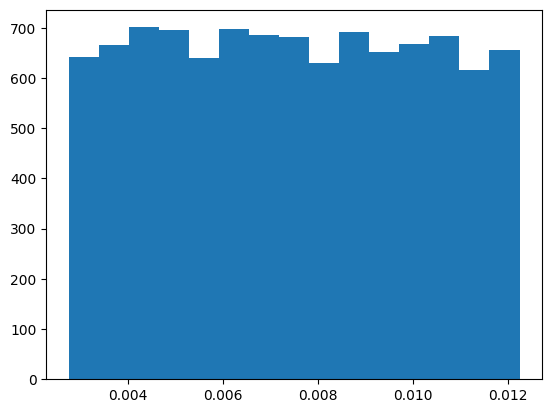

In [15]:
key = jax.random.key(10000)
mu = [.0025, .1]
alpha_dist, beta_dist = 2 , 8
# mus = jax.random.beta(key, alpha_dist, beta_dist, shape=(10000,))
mus = jax.random.uniform(key, shape=(10000, ), minval = mu[0], maxval = mu[1])
# mus = (mus - mus.min()) / (mus.max() - mus.min())
mus = mu[0] + mus * (mu[1] - mu[0])
plt.hist(mus, bins=15)
